# Check that old dataset and new dataset are identical

In [2]:
import numpy as np
from miann.data import NNDataset
import os
import tqdm

In [3]:
split = 'val'
dataset_new = '184A1_all_frac0005_neigh3_cond_pert-CC'
dataset_old = '/Users/hannah.spitzer/projects/pelkmans/local_data/NascentRNA/datasets/184A1_all_frac0005_neigh3_cond_pert-CC'

# new dataset
ds = NNDataset(dataset_new, data_config='NascentRNA')

# old dataset
ds_old = np.load(os.path.join(dataset_old, f'{split}_dataset.npz'))

In [4]:
# check that have same mapobject_ids
(np.unique(ds_old['mapobject_id']) == np.unique(ds.data[split].obj_ids)).all()

True

In [5]:
# check that have same content (but ordering is different due to different implementation of subsampling per object frac)
obj_ids = np.unique(ds.data[split].obj_ids)
for obj_id in tqdm.tqdm(obj_ids):
    mask_old = ds_old['mapobject_id'] == obj_id
    mask = ds.data[split].obj_ids == obj_id
    # check that have same length
    assert len(mask_old.nonzero()[0]) == len(mask.nonzero()[0])
    # check that conditions are the same
    assert (ds.data[split].conditions[mask] == ds_old['c'][mask_old]).all()
    # check that values of one channel are the same (ordering is different)
    ch_id = np.random.choice(range(34))
    vals_old = ds_old['x'][mask_old][:,1,1,ch_id]
    vals_new = ds.data[split].mpp[mask][:,1,1,ch_id]
    assert set(vals_old) == set(vals_new)


100%|██████████| 1181/1181 [02:51<00:00,  6.90it/s]


In [6]:
# look at images
img_old = np.load(os.path.join(data_path, 'test_imgs.npz'))

# check that have same mapobject ids
set(ds.imgs['test'].unique_obj_ids) == set(img_old['mapobject_id'])

True

In [7]:
# compare images
obj_id = img_old['mapobject_id'][0]
img = img_old['img'][0]

img_new = ds.imgs['test'].get_object_img(obj_id, img_size=225)

assert(img == img_new).all()

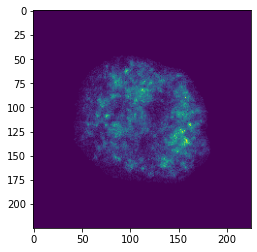

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:,0])
plt.imshow(img_new[:,:,0])